In [1]:
#
#Loading necessary modules
#

import os
import pandas as pd
import time
root = os.getcwd()
project_hpc = os.path.join(root, "../")
import matplotlib.pyplot as plt
data_hpc_protocol = os.path.join(project_hpc, "input_data")
data_hpc_protocol_csv = data_hpc_protocol
# data_hpc_protocol_csv = os.path.join(data_hpc_protocol,'csv_files')

In [2]:
os.listdir(data_hpc_protocol)

['csv_files',
 'subject101.dat',
 'subject102.dat',
 'subject103.dat',
 'subject104.dat',
 'subject105.dat',
 'subject106.dat',
 'subject107.dat',
 'subject108.dat',
 'subject109.dat']

In [3]:
#
#Convert .dat files to .csv file:
#

import csv
for file in os.listdir(data_hpc_protocol):
    datContent = [i.strip().split() for i in open(os.path.join(data_hpc_protocol,file)).readlines()]

    # write it as a new CSV file
    with open(os.path.join(data_hpc_protocol,file + ".csv"), "w") as f:
        writer = csv.writer(f)
        writer.writerows(datContent)
    del datContent

# Data loading and preprocessing using pandas 

In [3]:
%%time
#
#Reading patients data csv files and saving it to a single csv file:
#

for idx, patient_file in enumerate(os.listdir(data_hpc_protocol_csv)):
    if idx == 0:
        df = pd.read_csv(os.path.join(data_hpc_protocol_csv,patient_file)
                                                                  , header = None)
        patient_all_pd = df
    else:
        df = pd.read_csv(os.path.join(data_hpc_protocol_csv,patient_file)
                                                                  , header = None)
        patient_all_pd = patient_all_pd.append(df)

# patient_all_pd.to_csv(os.path.join(root,'input_data', 'combined_patient_csv_file'))

Wall time: 2min 8s


In [4]:
#
#Giving column names to dataset for more clarity
#

imus = [str('imu_' + str(x)) for x in list(range(51))]
col_names = ['time_stamp', 'activity_id', 'heart_rate_bpm']
col_names = col_names + imus

In [5]:
patient_all_pd.columns = col_names

In [6]:
patient_all_pd.head()

,time_stamp,activity_id,heart_rate_bpm,imu_0,imu_1,imu_2,imu_3,imu_4,imu_5,imu_6,...,imu_41,imu_42,imu_43,imu_44,imu_45,imu_46,imu_47,imu_48,imu_49,imu_50
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.008300,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0
1,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.006577,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0
2,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.003014,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0
3,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,0.003175,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0
4,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,0.012698,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0


# Preprocessing the data

In [7]:
%%time
#
#Removing the time stamp colums and heart_rate_bpm column wih many missing values missing values 
#as they are very small amount compared to the size of the data
#and won't have have any effect on the performance of training model
#

patient_all_pd.drop(columns = ['time_stamp','heart_rate_bpm'], axis =1, inplace = True)
patient_all_pd.dropna(inplace = True)


#Storing the cleaned dataset in csv file
patient_all_pd.to_csv(os.path.join(root,'input_data', 'combined_patient_csv_file_cleaned.csv'), index=False)
# del patient_all_pd

Wall time: 6min 56s


In [8]:
patient_all_pdent_all_pd.shape

(2844868, 52)

# Analyzing heart rate bpm

In [9]:
heart_rate_df = patient_all_pd[['activity_id', 'heart_rate_bpm']]

In [10]:
heart_rate_df.head()

,activity_id,heart_rate_bpm
0,0,104.0
1,0,NaN
2,0,NaN
3,0,NaN
4,0,NaN


In [15]:
heart_rate_df.shape

(2872533, 2)

In [16]:
heart_rate_df.dropna(inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
heart_rate_df.shape

(262268, 2)

In [23]:
heart_rate_df.groupby('activity_id').count()


,heart_rate_bpm
activity_id,
0,84860
1,17600
2,16929
3,17350
4,21786
5,8887
6,15044
7,17198
12,10709


In [25]:
#Removing all rows corresponding to activity id of 0
heart_rate_df = heart_rate_df[heart_rate_df.activity_id != 0]

In [26]:
heart_rate_df.shape

(177408, 2)

In [31]:
heart_rate_df.groupby('activity_id').mean()

,heart_rate_bpm
activity_id,
1,75.535682
2,80.012582
3,88.557637
4,112.789865
5,156.595814
6,124.879952
7,123.828701
12,129.523485
13,129.154175


In [32]:
heart_rate_df.replace({'activity_id': {1: 'lying', 2: 'sitting', 3: 'standing', 4: 'walking', 5: 'running', 6: 'cycling',
                                      7: 'Nordic walking', 9: 'watching TV', 10:'computer work', 11: 'car driving',
                                      12: 'ascending stairs', 13: 'descending stairs', 16: 'vacum cleaning', 17: 'ironing',
                                      18: 'folding laundary', 19: 'house cleaning', 20: 'playing soccer', 24: 'rope jumping'}}
                      , inplace = True)

In [39]:
heart_rate_by_activity_id = heart_rate_df.groupby('activity_id').mean()

In [40]:
heart_rate_by_activity_id

,heart_rate_bpm
activity_id,
Nordic walking,123.828701
ascending stairs,129.523485
cycling,124.879952
descending stairs,129.154175
ironing,90.069591
lying,75.535682
rope jumping,161.981391
running,156.595814
sitting,80.012582


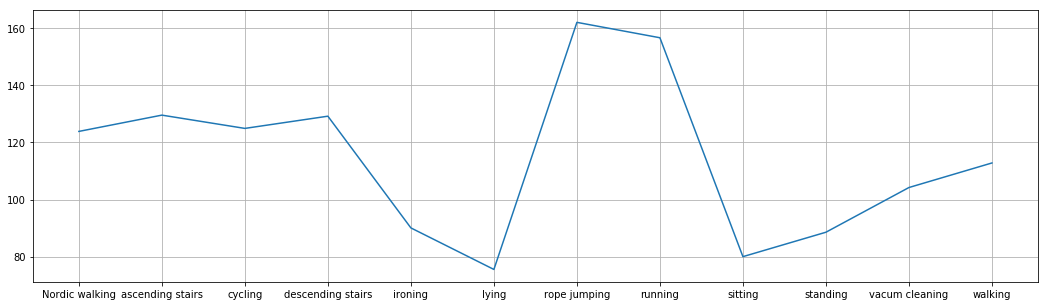

In [50]:
fig = plt.figure(figsize=(18, 5))
ax = fig.add_subplot(111)
ax.plot(heart_rate_by_activity_id)
ax.grid()
plt.show()


In [18]:
patient_all_pd.shape

(2872533, 54)

# Data Loading and preprocessing using Spark

In [3]:
#
#Setting up spark session
#

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('HPC_Project')

spark = SparkSession.builder.appName('HPC_Project').getOrCreate()


In [4]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier

In [5]:
%%time
#
#Reading patients data csv files for spark
#

for idx,patient_file in enumerate(os.listdir(data_hpc_protocol_csv)):
    if idx == 0:
        df = spark.read.csv(os.path.join(data_hpc_protocol_csv,patient_file)
                                                                  , inferSchema=True, header = False)

        patient_all = df
    else:
        df = spark.read.csv(os.path.join(data_hpc_protocol_csv,patient_file)
                                                                  , inferSchema=True, header = False)
        patient_all = patient_all.unionAll(df)
    

Wall time: 27.2 s


In [6]:
%%time
#
#Reading patients data csv files fro pandas
#

for idx, patient_file in enumerate(os.listdir(data_hpc_protocol_csv)):
    if idx == 0:
        df = pd.read_csv(os.path.join(data_hpc_protocol_csv,patient_file)
                                                                  , header = None)
        patient_all_pd = df
    else:
        df = pd.read_csv(os.path.join(data_hpc_protocol_csv,patient_file)
                                                                  , header = None)
        patient_all_pd = patient_all_pd.append(df)
                                   
     

Wall time: 1min 56s


In [15]:
patient_all.printSchema()

root
 |-- _c0: double (nullable = true)
 |-- _c1: integer (nullable = true)
 |-- _c2: double (nullable = true)
 |-- _c3: double (nullable = true)
 |-- _c4: double (nullable = true)
 |-- _c5: double (nullable = true)
 |-- _c6: double (nullable = true)
 |-- _c7: double (nullable = true)
 |-- _c8: double (nullable = true)
 |-- _c9: double (nullable = true)
 |-- _c10: double (nullable = true)
 |-- _c11: double (nullable = true)
 |-- _c12: double (nullable = true)
 |-- _c13: double (nullable = true)
 |-- _c14: double (nullable = true)
 |-- _c15: double (nullable = true)
 |-- _c16: double (nullable = true)
 |-- _c17: double (nullable = true)
 |-- _c18: double (nullable = true)
 |-- _c19: double (nullable = true)
 |-- _c20: double (nullable = true)
 |-- _c21: double (nullable = true)
 |-- _c22: double (nullable = true)
 |-- _c23: double (nullable = true)
 |-- _c24: double (nullable = true)
 |-- _c25: double (nullable = true)
 |-- _c26: double (nullable = true)
 |-- _c27: double (nullable = tr

# Preprocessing data using spark

In [7]:
#
#Formating data according to spark's format
#


from pyspark.ml.feature import VectorAssembler

In [8]:
patient_all_cleaned = patient_all.dropna()

In [9]:
%%time
patient_all.count()

Wall time: 5.81 s


2872533

In [10]:
%%time
drop_list = ['_c0', '_c2']
patient_all_imp_cols = patient_all.select([column for column in patient_all_cleaned.columns if column not in drop_list])

Wall time: 172 ms


In [11]:
patient_all_imp_cols.printSchema()

root
 |-- _c1: integer (nullable = true)
 |-- _c3: double (nullable = true)
 |-- _c4: double (nullable = true)
 |-- _c5: double (nullable = true)
 |-- _c6: double (nullable = true)
 |-- _c7: double (nullable = true)
 |-- _c8: double (nullable = true)
 |-- _c9: double (nullable = true)
 |-- _c10: double (nullable = true)
 |-- _c11: double (nullable = true)
 |-- _c12: double (nullable = true)
 |-- _c13: double (nullable = true)
 |-- _c14: double (nullable = true)
 |-- _c15: double (nullable = true)
 |-- _c16: double (nullable = true)
 |-- _c17: double (nullable = true)
 |-- _c18: double (nullable = true)
 |-- _c19: double (nullable = true)
 |-- _c20: double (nullable = true)
 |-- _c21: double (nullable = true)
 |-- _c22: double (nullable = true)
 |-- _c23: double (nullable = true)
 |-- _c24: double (nullable = true)
 |-- _c25: double (nullable = true)
 |-- _c26: double (nullable = true)
 |-- _c27: double (nullable = true)
 |-- _c28: double (nullable = true)
 |-- _c29: double (nullable = 

In [12]:
patient_all_imp_cols.count()

2872533

In [13]:
%%time
patient_all_imp_cols.dropna().count()

Wall time: 26.1 s


2844868

In [14]:
%%time
patient_all.dropna().count()

Wall time: 28.4 s


259803

In [15]:
patient_all_cleaned.count()

259803

In [16]:
assembler = VectorAssembler(inputCols=['_c0',
 '_c2',
 '_c3',
 '_c4',
 '_c5',
 '_c6',
 '_c7',
 '_c8',
 '_c9',
 '_c10',
 '_c11',
 '_c12',
 '_c13',
 '_c14',
 '_c15',
 '_c16',
 '_c17',
 '_c18',
 '_c19',
 '_c20',
 '_c21',
 '_c22',
 '_c23',
 '_c24',
 '_c25',
 '_c26',
 '_c27',
 '_c28',
 '_c29',
 '_c30',
 '_c31',
 '_c32',
 '_c33',
 '_c34',
 '_c35',
 '_c36',
 '_c37',
 '_c38',
 '_c39',
 '_c40',
 '_c41',
 '_c42',
 '_c43',
 '_c44',
 '_c45',
 '_c46',
 '_c47',
 '_c48',
 '_c49',
 '_c50',
 '_c51',
 '_c52',
 '_c53'], outputCol = 'features')

In [17]:
# patient_all_libsvm_format = assembler.transform(patient_all_cleaned)
patient_all_libsvm_format = assembler.transform(patient_all)

In [18]:
patient_all_libsvm_format.printSchema()

root
 |-- _c0: double (nullable = true)
 |-- _c1: integer (nullable = true)
 |-- _c2: double (nullable = true)
 |-- _c3: double (nullable = true)
 |-- _c4: double (nullable = true)
 |-- _c5: double (nullable = true)
 |-- _c6: double (nullable = true)
 |-- _c7: double (nullable = true)
 |-- _c8: double (nullable = true)
 |-- _c9: double (nullable = true)
 |-- _c10: double (nullable = true)
 |-- _c11: double (nullable = true)
 |-- _c12: double (nullable = true)
 |-- _c13: double (nullable = true)
 |-- _c14: double (nullable = true)
 |-- _c15: double (nullable = true)
 |-- _c16: double (nullable = true)
 |-- _c17: double (nullable = true)
 |-- _c18: double (nullable = true)
 |-- _c19: double (nullable = true)
 |-- _c20: double (nullable = true)
 |-- _c21: double (nullable = true)
 |-- _c22: double (nullable = true)
 |-- _c23: double (nullable = true)
 |-- _c24: double (nullable = true)
 |-- _c25: double (nullable = true)
 |-- _c26: double (nullable = true)
 |-- _c27: double (nullable = tr

In [19]:
patient_all_libsvm_format_final = patient_all_libsvm_format.select('features','_c1')

In [20]:
patient_all_libsvm_format_final.printSchema()

root
 |-- features: vector (nullable = true)
 |-- _c1: integer (nullable = true)



In [21]:
patient_all_libsvm_format_final.head(1)

[Row(features=DenseVector([8.38, 104.0, 30.0, 2.3722, 8.6007, 3.5105, 2.4395, 8.7616, 3.3546, -0.0922, 0.0568, -0.0158, 14.6806, -69.2128, -5.589, 1.0, 0.0, 0.0, 0.0, 31.8125, 0.2381, 9.8, -1.689, 0.2653, 9.8155, -1.4134, -0.0051, -0.0068, -0.0057, 0.472, -51.0499, 43.2903, 1.0, 0.0, 0.0, 0.0, 30.3125, 9.6592, -1.6557, -0.0998, 9.6469, -1.5558, 0.3104, 0.0083, 0.0093, -0.0176, -61.1888, -38.9599, -58.1438, 1.0, 0.0, 0.0, 0.0]), _c1=0)]

In [22]:

#
#train_test_split for model fitting
#

train_data, test_data = patient_all_libsvm_format_final.randomSplit([0.7,0.3])

# Spark Model Fitting

In [32]:
rfc = RandomForestClassifier(labelCol='_c1', featuresCol='features',)

In [141]:
%%time
#
#Training RF model with default parameters using spark
#
rfc_spark_model = rfc.fit(train_data)

Wall time: 2min 43s


In [142]:
%%time
#
#Model evaluation for spark
#

rfc_preds = rfc_spark_model.transform(test_data)

Wall time: 80.4 ms


In [143]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
acc_eval  = MulticlassClassificationEvaluator(metricName='accuracy', labelCol='_c1')

In [144]:
#
#RFC_Accuracy for spark
#

acc_eval.evaluate(rfc_preds)

0.6465608870818016

# Scikit model fitting 

In [24]:

from sklearn.ensemble import RandomForestClassifier as RF_SK
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
sk_rf = RF_SK()

In [29]:
patient_all_pd_cleaned = patient_all_pd.dropna()
patient_all_pd_cleaned.shape

(259803, 54)

In [30]:
#
#train_test split for scikit learn model fitting 
#
train_data_pd, test_data_pd = train_test_split(patient_all_pd,train_size = 0.7,test_size = 0.3)

In [31]:
columns = [0]
c1 = list(range(2,54))
columns.extend(c1)

In [ ]:
%%time


#
#Model fitting using scikit-learn
#

sk_rf_model = sk_rf.fit(X = train_data_pd[columns],y = train_data_pd[1])

In [128]:
%%time

#
#Making predictions using scikit-learn
#


sk_rf_preds = sk_rf_model.predict(test_data_pd[columns])

Wall time: 515 ms


In [133]:
#
#Accuracy using scikit-learn
#

accuracy_score(test_data_pd[1], sk_rf_preds)

0.9830127917270756